#### Movies EDA


#### Import Libraries

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
! pip install pandas


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\carlo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


#### Load Dataset

In [3]:
df = pd.read_csv("movies.csv")

#### Dataset Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [5]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'score'}>],
       [<Axes: title={'center': 'votes'}>,
        <Axes: title={'center': 'budget'}>],
       [<Axes: title={'center': 'gross'}>,
        <Axes: title={'center': 'runtime'}>]], dtype=object)

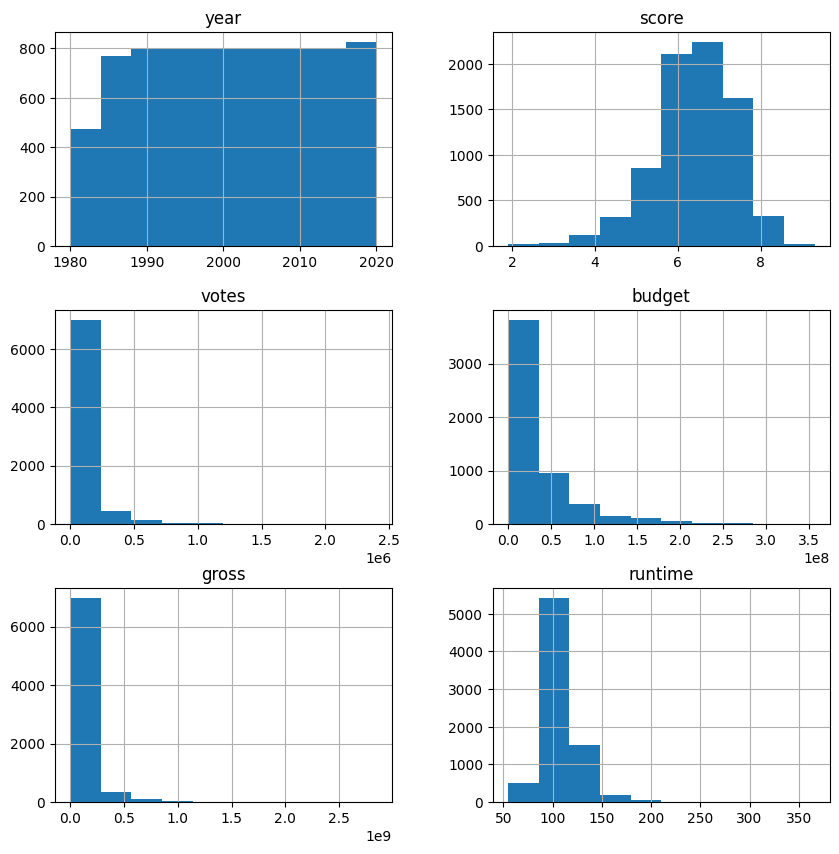

In [6]:
df.hist(figsize=(10,10))

In [7]:
df.isnull().sum()
df.shape

(7668, 15)

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()
df.shape

(5421, 15)

#### What is the movie with the highesr score?

In [10]:
df["score"].idxmax()

2443

In [11]:
df.loc[df["score"].idxmax()]

name                The Shawshank Redemption
rating                                     R
genre                                  Drama
year                                    1994
released    October 14, 1994 (United States)
score                                    9.3
votes                              2400000.0
director                      Frank Darabont
writer                          Stephen King
star                             Tim Robbins
country                        United States
budget                            25000000.0
gross                             28817291.0
company            Castle Rock Entertainment
runtime                                142.0
Name: 2443, dtype: object

In [12]:
df.loc[df["score"].idxmin()]

name           Superbabies: Baby Geniuses 2
rating                                   PG
genre                                Comedy
year                                   2004
released    August 27, 2004 (United States)
score                                   1.9
votes                               30000.0
director                          Bob Clark
writer                      Robert Grasmere
star                             Jon Voight
country                             Germany
budget                           20000000.0
gross                             9448644.0
company            ApolloMedia Distribution
runtime                                88.0
Name: 4594, dtype: object

In [13]:
df.loc[df["year"].idxmax()]

name                                    Tenet
rating                                  PG-13
genre                                  Action
year                                     2020
released    September 3, 2020 (United States)
score                                     7.4
votes                                387000.0
director                    Christopher Nolan
writer                      Christopher Nolan
star                    John David Washington
country                         United States
budget                            205000000.0
gross                             363656624.0
company                          Warner Bros.
runtime                                 150.0
Name: 7643, dtype: object

#### Top 10 best movies

In [14]:
filtered_df = df[['name', 'score']].sort_values(by='score', ascending=False).head(10)
filtered_df.sort_values(by='score', ascending=False).head(10)

name  score
2443                           The Shawshank Redemption    9.3
5243                                    The Dark Knight    9.0
2247                                   Schindler's List    8.9
2444                                       Pulp Fiction    8.9
4245      The Lord of the Rings: The Return of the King    8.9
5643                                          Inception    8.8
2445                                       Forrest Gump    8.8
3444                                         Fight Club    8.8
3845  The Lord of the Rings: The Fellowship of the Ring    8.8
3443                                         The Matrix    8.7

#### Movies per year

In [15]:
movies_per_year = df.groupby('year')['name'].count()
movies_per_year

year
1980     40
1981     63
1982     71
1983     83
1984     88
1985     95
1986     99
1987    104
1988    130
1989    115
1990    111
1991    113
1992    131
1993    140
1994    128
1995    138
1996    144
1997    149
1998    148
1999    162
2000    162
2001    164
2002    173
2003    159
2004    158
2005    170
2006    163
2007    157
2008    171
2009    171
2010    164
2011    160
2012    162
2013    161
2014    163
2015    156
2016    158
2017    133
2018    143
2019    113
2020      8
Name: name, dtype: int64

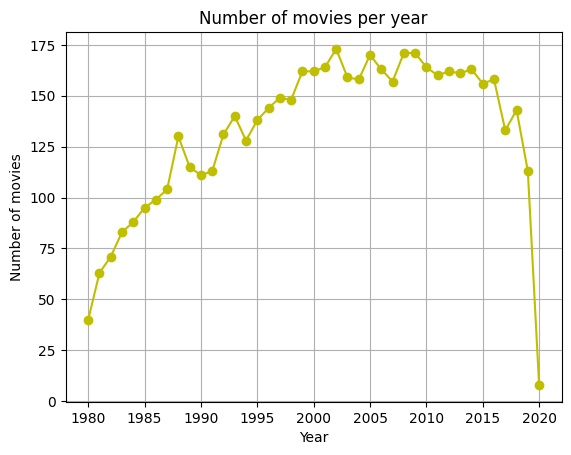

In [16]:
plt.plot(movies_per_year.index, movies_per_year.values, marker='o', color='y')
plt.title("Number of movies per year")
plt.xlabel("Year")
plt.ylabel("Number of movies")
plt.grid(True)
plt.show()

#### Avg budget vs Gross over the years

In [17]:
budget_gross = df.groupby('year')[['budget','gross']].mean()
budget_gross

budget         gross
year                            
1980  1.156625e+07  4.429196e+07
1981  1.099841e+07  2.918663e+07
1982  1.176725e+07  3.804393e+07
1983  1.069517e+07  2.796927e+07
1984  1.260915e+07  3.396954e+07
1985  1.271853e+07  3.403673e+07
1986  1.275442e+07  2.964930e+07
1987  1.314007e+07  3.228688e+07
1988  1.328715e+07  3.347553e+07
1989  1.538424e+07  4.846537e+07
1990  1.823877e+07  5.477707e+07
1991  1.998450e+07  4.898839e+07
1992  2.021343e+07  4.950053e+07
1993  1.904750e+07  5.188667e+07
1994  2.539262e+07  6.527944e+07
1995  2.566546e+07  6.183214e+07
1996  2.878181e+07  6.301720e+07
1997  3.524795e+07  8.501497e+07
1998  3.689031e+07  7.335474e+07
1999  4.121877e+07  8.161126e+07
2000  3.907562e+07  8.136492e+07
2001  3.927378e+07  9.375281e+07
2002  3.662213e+07  9.503332e+07
2003  4.149956e+07  1.081816e+08
2004  4.428688e+07  1.147133e+08
2005  4.229114e+07  1.022235e+08
2006  4.390000e+07  1.096732e+08
2007  4.500325e+07  1.226607e+08
2008  4.376509e+07  1.223059e+08
2009  4.399123e+07  1.323977e+08
2010  4.666311e+07  1.328565e+08
2011  4.917956e+07  1.498019e+08
2012  4.776108e+07  1.552328e+08
2013  5.032093e+07  1.596252e+08
2014  4.573190e+07  1.607302e+08
2015  4.692132e+07  1.680571e+08
2016  5.560127e+07  1.762504e+08
2017  5.571203e+07  2.081188e+08
2018  4.904182e+07  1.927169e+08
2019  5.873407e+07  2.450678e+08
2020  1.076875e+08  2.841127e+08

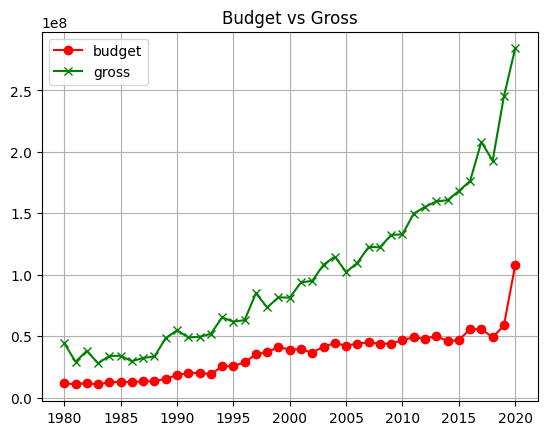

In [18]:
plt.plot(budget_gross.index, budget_gross['budget'], marker='o', color='red', label='budget')
plt.plot(budget_gross.index, budget_gross['gross'], marker='x', color='g', label='gross')
plt.title("Budget vs Gross")
plt.grid(True)
plt.legend()


#### Correlation

In [19]:
correlation_matrix = df[['budget', 'gross','score','votes']].corr()

Text(0.5, 1.0, 'Correlation Heatmap')

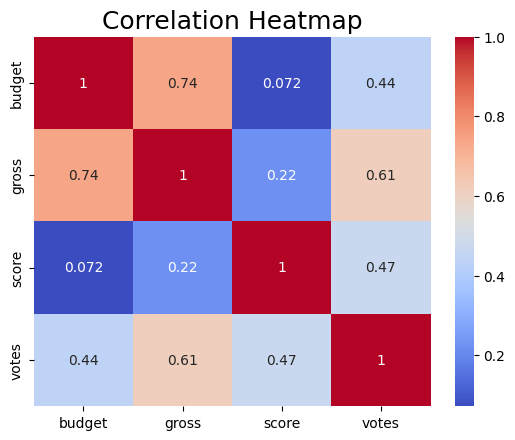

In [20]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap', fontsize=18)

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


#### Separate predictor from target variablw (independet vs dependet)

In [22]:
X = df[['budget']]
y = df[['gross']]

In [23]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [24]:
y_pred = model.predict(X)

In [25]:
r2 = r2_score(y, y_pred)
print("R2: ", r2)


R2:  0.5479649457884108


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


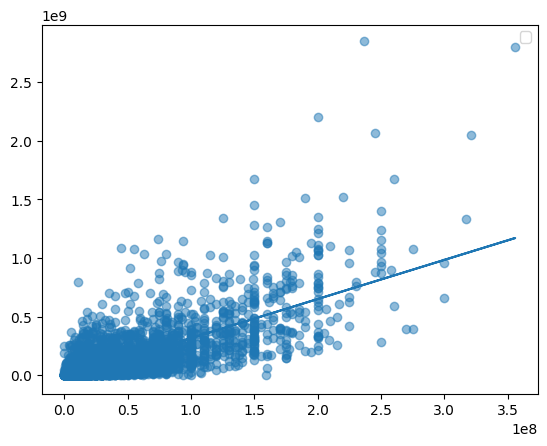

In [26]:
plt.scatter(X,y, alpha=0.5 )
plt.plot(X,y_pred)
plt.legend()
plt.show()